In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch

from netam.common import heavy_chain_shim
from netam.framework import load_crepe
from netam.sequences import translate_sequence, AA_STR_SORTED
from dnsmex.dasm_viz import dms_style_heatmap
from dnsmex.local import localify

figures_dir = localify("FIGURES_DIR")
os.makedirs("_output", exist_ok=True)

# set mpl font to lato
plt.rcParams["font.family"] = "Lato"

In [2]:
heavy_wt = "EVQLVESGGGLVQPGGSLRLSCAASGFTISDYWIHWVRQAPGKGLEWVAGITPAGGYTYYADSVKGRFTISADTSKNTAYLQMNSLRAEDTAVYYCARFVFFLPYAMDYWGQGTLVTVSS"

In [3]:
def assign_wt(df, wt_seq, value):
    for idx, aa in enumerate(wt_seq):
        df.loc[aa, idx+1] = value

def df_of_arr(arr):
    return pd.DataFrame(arr, columns=range(1, arr.shape[1] + 1), index=list(AA_STR_SORTED))

In [4]:
# Load DASM model
crepe = load_crepe(localify("DASM_TRAINED_MODELS_DIR/dasm_4m-v1jaffeCC+v1tangCC-joint"))
crepe.model.train()
crepe = heavy_chain_shim(crepe)
[dasm_heavy] = crepe([heavy_wt])
log_dasm_heavy = (np.log(dasm_heavy).T)
log_dasm_heavy_df = df_of_arr(log_dasm_heavy)
assign_wt(log_dasm_heavy_df, heavy_wt, np.nan)

In [5]:
def zero_centered_cb_min_center_max(df):
    data_min = df.min().min()
    data_max = df.max().max()
    assert data_min < 0 and data_max > 0
    return data_min, 0, data_max

def make_heatmap(df, ax, colorbar_label):
    _ = dms_style_heatmap(
        df, 
        ax=ax, 
        cb_min_center_max=zero_centered_cb_min_center_max(df), 
        plot_aa_order=list("YWFLIVAMKRHDESTNQPGC"),
        colorbar_label=colorbar_label)

EVQLVESGGGLVQPGGSLRLSCAASGFTISDYWIHWVRQAPGKGLEWVAGITPAGGYTYYADSVKGRFTISADTSKNTAYLQMNSLRAEDTAVYYCARFVFFLPYAMDYWGQGTLVTVSS


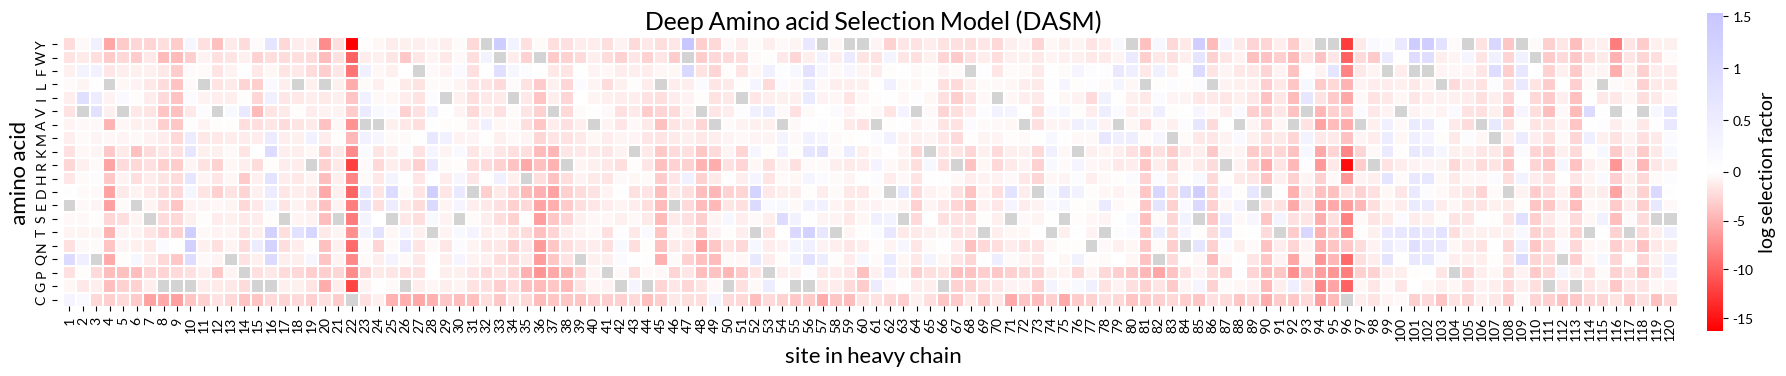

In [6]:
# Saving a version of the heatmap for an early slide
fig, ax = plt.subplots(1, 1, figsize=(18, 4))

print(heavy_wt)

make_heatmap(log_dasm_heavy_df, ax, "log selection factor")
ax.set_title('Deep Amino acid Selection Model (DASM)', fontsize=18)
ax.set_xlabel('site in heavy chain', fontsize=16)
ax.set_ylabel('amino acid', fontsize=16)
plt.tight_layout()

fig.savefig(f"{figures_dir}/koenig2017_sequence_dasm_heatmap.svg")

In [7]:
[dasm_heavy] = crepe([heavy_wt])
dasm_heavy

tensor([[0.4435, 1.1188, 0.6112,  ..., 0.1236, 0.1565, 0.0895],
        [0.6914, 1.2223, 0.6381,  ...,    nan, 0.1075, 0.4304],
        [0.5216, 0.0633, 0.3993,  ..., 1.9185, 0.1182, 0.8975],
        ...,
        [0.2112, 0.2072, 0.0170,  ...,    nan, 0.0516, 0.0103],
        [0.7687, 0.0158, 2.2381,  ..., 0.9604, 0.1630, 0.2788],
        [2.0586, 0.0773, 1.1034,  ..., 1.9879, 1.0834, 0.4823]])